### Classifying Fashion-MNIST

In [1]:
# importing all the necessary modules
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

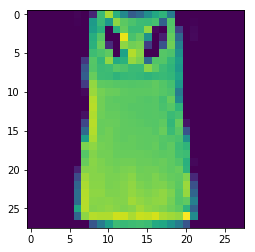

In [3]:
# check one of the images in the training data
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

In [4]:
# define the network architecture
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_1 = nn.Linear(784,256)
        self.hidden_2 = nn.Linear(256,128)
        self.hidden_3 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self,x):
        # flatten the images
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.relu(self.hidden_3(x))
        x = F.log_softmax(self.output(x), dim=1)
        
        return x

In [5]:
# create a network model & define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [6]:
# train the network
for epoch in range(10):
    running_loss = 0
    for images, labels in trainloader:
        output = model(images)
        loss = criterion(output,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print('The loss for epoch #',epoch+1,'is', running_loss)

The loss for epoch # 1 is 1970.0080186128616
The loss for epoch # 2 is 1107.988126039505
The loss for epoch # 3 is 778.5797373354435
The loss for epoch # 4 is 663.949054479599
The loss for epoch # 5 is 604.5276130735874
The loss for epoch # 6 is 563.967122733593
The loss for epoch # 7 is 533.6246721148491
The loss for epoch # 8 is 509.3006189763546
The loss for epoch # 9 is 489.08058996498585
The loss for epoch # 10 is 471.280984967947


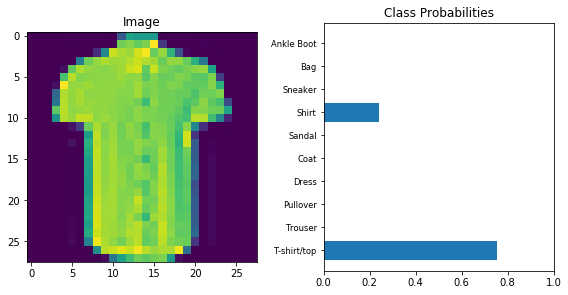

In [7]:
# get one image from the testloader
images, labels = next(iter(testloader))
img = images[0]

# calculate the class probabilities
ps = torch.exp(model(img))

# show the image and the probability of its presicted label
ps = ps.data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(8,8), ncols=2)
# flatten and show the image
ax1.imshow(img.view(1, 28, 28).numpy().squeeze())
ax1.set_title('Image')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                    size='small');
ax2.set_title('Class Probabilities')
ax2.set_xlim(0,1)
plt.tight_layout()